In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from dataclasses import dataclass

In [2]:
seed = 42

In [3]:
df = pd.read_csv('data.csv')
df.drop_duplicates(inplace=True)
df.drop(columns=['ID'], inplace=True)
df.reset_index(drop=True)
df.sample(5)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
3028,22.0,female,31.02,3,yes,southeast,Married,Finance,Lightly Active,6.7,Good,239905.92,35595.5898
1077,19.0,female,33.11,0,yes,southeast,Married,Healthcare,Lightly Active,6.1,Fair,149567.31,34439.8559
2564,19.0,male,35.40,0,no,southwest,Single,Unemployed,Lightly Active,7.0,Good,5686.33,1263.2490
2560,46.0,male,25.80,5,no,southwest,Single,Retail,Lightly Active,7.9,Fair,42390.18,10096.9700
2682,49.0,female,27.10,1,no,southwest,Married,Healthcare,Lightly Active,3.8,Good,118070.34,26140.3603


In [4]:
df.describe()

,age,bmi,children,stress_level,income (USD),charges (USD)
count,3090.000000,3059.000000,3090.000000,3090.000000,3090.000000,3067.000000
mean,39.090493,32.164780,1.119094,6.413689,62418.074529,13488.414417
std,14.139518,99.455521,1.208068,1.722001,64708.943854,12091.943251
min,-8.000000,-989.915959,-3.000000,0.000000,-126055.018185,1000.000000
25%,27.000000,26.315000,0.000000,5.200000,20236.880000,4719.524050
50%,39.000000,30.495000,1.000000,6.400000,41783.988014,9644.252500
75%,51.000000,34.800000,2.000000,7.600000,83985.069923,17870.867613
max,88.336729,5424.864393,5.000000,10.000000,528054.020000,63770.428010


In [5]:
print(f'smoker: {df.smoker.unique()}')
print(f'gender: {df.gender.unique()}')
print(f'region: {df.region.unique()}')
print(f'status: {df.status.unique()}')
print(f'work sector: {df.work_sector.unique()}')
print(f'sleep quality: {df.sleep_quality.unique()}')
print(f'physical activity: {df.physical_activity.unique()}')

smoker: ['no' 'yes' '-' 'DFH']
gender: ['female' 'male']
region: ['southwest' 'northwest' 'southeast' 'northeast']
status: ['Single' 'Engaged' 'Married' 'Single-Parent' 'CDE' 'ABC' nan]
work sector: ['Education' 'IT Support' 'Transportation' 'Hospitality' 'Unemployed'
 'Healthcare Support' 'Retail' 'Entrepreneur' 'Finance' 'Construction'
 'Retail Management' 'Healthcare' 'Law' 'Management' 'Self-Employed' 'IT'
 nan 'Engineering' 'Wizardry' 'Interdimensional Trade']
sleep quality: ['Fair' 'Poor' 'Good' 'Excellent' 'CDE']
physical activity: ['Lightly Active' 'Sedentary' 'Very Active' 'Moderately Active' nan
 'video-gamer']


In [6]:
mask = (df['status'] == 'ABC') | (df['status'] == 'CDE') | (df['sleep_quality'] == 'CDE') | (
        df['physical_activity'] == 'video-gamer')
df[mask]
# drop those 3 as they make no sense and ~0.1% of dataset
# all of them have 2 'corrupted' features

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
36,32.027049,male,32.316381,-3,no,southeast,Married,Construction,Moderately Active,5.3,CDE,9390.753386,10412.900531
573,22.632769,male,-989.915959,0,no,northwest,CDE,Healthcare Support,Lightly Active,2.0,Excellent,98023.266602,22486.448061
639,44.676202,male,27.186491,0,yes,southeast,ABC,Wizardry,video-gamer,4.9,Good,85887.492717,14737.870783


also 'Wizardry' and 'Interdimensional Trade' are strange, I'll drop them to nan and use as Unknown

In [7]:
df.work_sector = df.work_sector.replace(['Wizardry', 'Interdimensional Trade'], np.nan)

In [8]:
df = df[~mask]
df.reset_index(drop=True)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
0,45.0,female,25.700,3,no,southwest,Single,Education,Lightly Active,6.9,Fair,44324.35,9101.79800
1,32.0,male,28.120,4,yes,northwest,Engaged,IT Support,Sedentary,6.9,Poor,102553.91,21472.47880
2,41.0,female,37.100,2,-,southwest,Single,Transportation,Very Active,5.9,Fair,18429.43,7371.77200
3,26.0,male,31.065,0,no,northwest,Single,Education,Sedentary,5.9,Fair,14888.09,2699.56835
4,23.0,female,34.960,3,no,northwest,Married,Hospitality,Sedentary,8.6,Good,15571.19,4466.62140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,54.0,male,34.210,2,yes,southeast,Married,Finance,Lightly Active,9.2,Poor,336130.93,44260.74990
3083,18.0,female,31.350,4,no,northeast,Single,Retail,Sedentary,10.0,Poor,21624.45,4561.18850
3084,39.0,female,23.870,5,no,southeast,Single,Transportation,Lightly Active,5.8,Good,36357.70,8582.30230
3085,58.0,male,25.175,0,no,northeast,Single,Education,Lightly Active,4.7,Poor,69475.40,11931.12525


let's encode features:
- gender to boolean 'is_male'
- smoker oneHot (smoking, not smoking, unknown)
- region oneHot
- status oneHot (later after imputation)
- work_sector oneHot (later after imputation)
- sleep_quality numerical (as it's ordinal Poor -> Excellent)
- physical_activity numerical (as it's ordinal Sedentary -> Very Active)

In [9]:
print(f'{(df.children < 0).sum()} negative children rows')
df[(df.age < 18)]

1 negative children rows


,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
87,15.123557,female,30.360872,0,no,southeast,Single,Retail,Lightly Active,6.3,Poor,87861.868595,12864.070934
229,15.727649,female,41.854735,3,no,southeast,Married,IT,Moderately Active,4.5,Poor,140960.706083,46680.037223
306,15.168302,female,33.939556,0,yes,southwest,Engaged,Retail Management,Moderately Active,6.7,Fair,111189.507135,2495.923471
450,6.190668,female,22.324037,1,no,southeast,Married,Hospitality,Sedentary,1.8,Excellent,865.951745,5679.525258
454,13.329776,male,31.931234,3,yes,northwest,Single,Healthcare,Sedentary,7.3,Poor,86474.198292,29890.117369
482,2.374126,female,26.686038,1,no,northwest,Single,Finance,Moderately Active,6.5,Fair,101398.371162,27999.218508
695,2.879041,female,28.338212,2,yes,southwest,Single,Finance,Lightly Active,9.1,Poor,148958.692649,37556.610697
789,15.834161,male,38.075766,1,no,northwest,Single,Healthcare,Lightly Active,8.1,Poor,7890.258501,17332.663693
871,12.526339,female,26.256683,2,no,northwest,Married,Management,Moderately Active,4.3,Fair,143381.792011,3256.099146
882,10.592705,male,31.844211,0,yes,northeast,Married,Hospitality,Lightly Active,6.2,Poor,20342.800913,23619.942885


only one with negative children, let's just set it to 0

those values of age make no sense (married or with children at <18...)

let's drop those with nan, and later impute them

In [10]:
df['smoker'] = df['smoker'].str.strip().str.lower()
df['smoking'] = df['smoker'].eq('yes').astype('float')
df['not_smoking'] = df['smoker'].eq('no').astype('float')
df = df.drop(columns=['smoker'])
df.children = df.children.apply(lambda x: max(x, 0)).astype(float)
df['is_male'] = df.gender.apply(lambda x: 1 if x == 'male' else 0).astype(float)
df.drop(columns=['gender'], inplace=True)
df = pd.get_dummies(df, columns=['region'], drop_first=True, dtype=float)
df.sleep_quality = df.sleep_quality.apply(lambda x:
                                          {
                                              'Poor': 0,
                                              'Fair': 1,
                                              'Good': 2,
                                              'Excellent': 3
                                          }[x]).astype(float)
df.physical_activity = df.physical_activity.apply(lambda x:
                                                  {
                                                      'Sedentary': 0,
                                                      'Lightly Active': 1,
                                                      'Moderately Active': 2,
                                                      'Very Active': 3
                                                  }.get(x, np.nan)).astype(float)
df.age = df.age.where(df.age >= 18)
df.sample(10)

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest
2944,57.000000,22.230000,0.0,Single,Hospitality,2.0,6.9,0.0,108768.020000,12029.286700,0.0,0.0,0.0,0.0,0.0,0.0
2595,43.000000,34.580000,1.0,Single,Transportation,2.0,4.6,0.0,55927.460000,7727.253200,0.0,1.0,0.0,1.0,0.0,0.0
1325,34.000000,25.300000,2.0,Married,Finance,0.0,4.3,1.0,58722.170000,18972.495000,1.0,0.0,1.0,0.0,1.0,0.0
13,27.000000,31.400000,0.0,Married,Entrepreneur,1.0,8.5,2.0,150510.460000,34838.873000,1.0,0.0,0.0,0.0,0.0,1.0
899,46.000000,33.345000,1.0,Engaged,Education,1.0,5.5,1.0,33884.670000,8334.457550,0.0,1.0,1.0,0.0,0.0,0.0
26,43.000000,35.310000,2.0,Married,Retail Management,0.0,3.8,3.0,120444.030000,18806.145470,0.0,1.0,1.0,0.0,1.0,0.0
1018,18.000000,31.350000,0.0,Single,Unemployed,2.0,6.1,2.0,6336.760000,1622.188500,0.0,1.0,0.0,0.0,1.0,0.0
1751,27.405583,39.387047,2.0,Married,Retail,0.0,7.4,0.0,88404.143632,20912.052434,0.0,1.0,0.0,0.0,0.0,1.0
799,55.000000,26.980000,0.0,Single,Transportation,2.0,5.8,1.0,48853.220000,11082.577200,0.0,1.0,0.0,1.0,0.0,0.0
733,43.000000,35.310000,2.0,Married,IT Support,0.0,4.2,1.0,75137.170000,18806.145470,0.0,1.0,1.0,0.0,1.0,0.0


In [11]:
row_misses = df.isna().mean(axis=1) * 100
(row_misses > 30).sum()  # all rows good

0

now let's check outliers

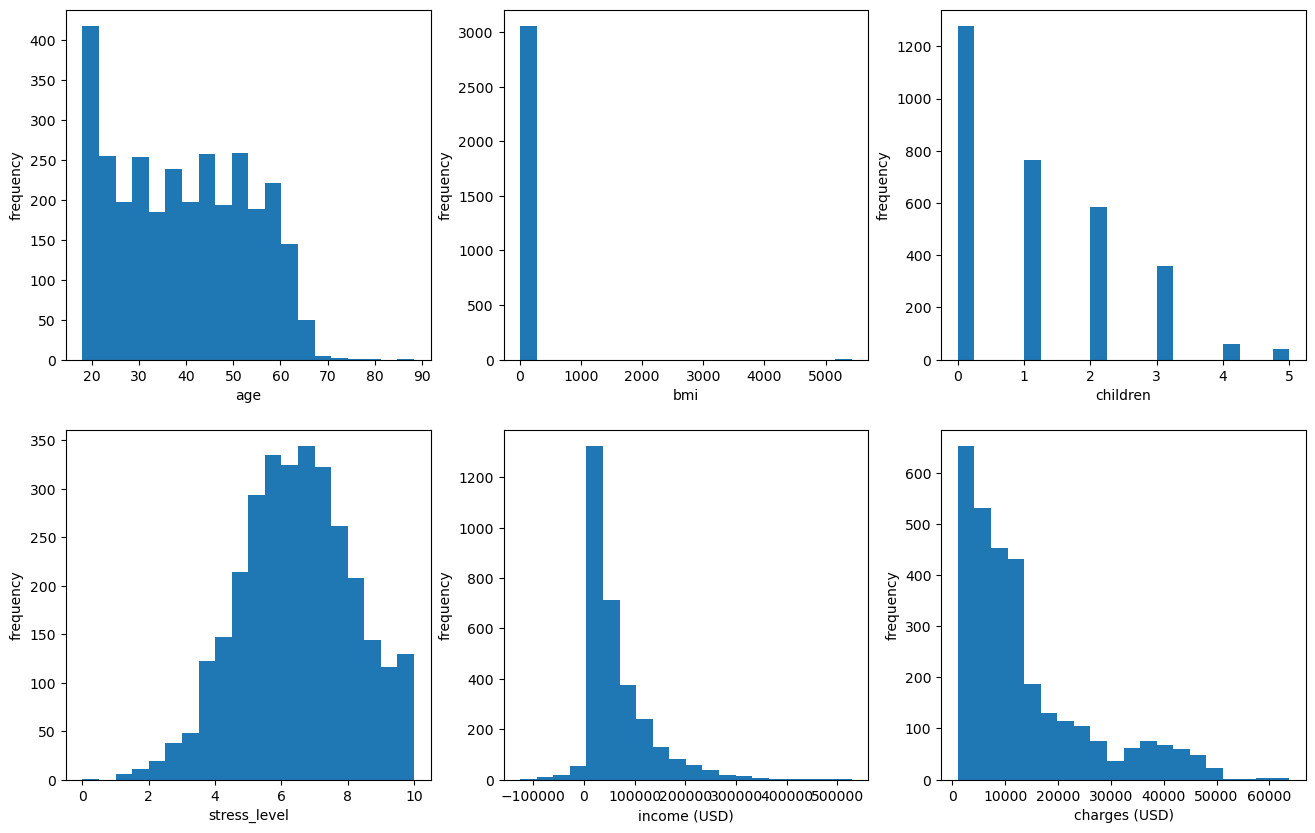

In [12]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

- bmi clearly have outliers
- income is super skewed, let's drop negative vals (for later imputation) and do log transform
- charges skewed too, same log there
- age is uniform, so let's bin it
- also we have negative income... I'll make a flag for those values (negative_income_flag), this flag would allow us to treat those values better OR it'll be reduced on feature selection phase

In [13]:
(df['income (USD)'] <= 0).sum()

54

In [14]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df.bmi = df.bmi.mask((df.bmi < lower) | (df.bmi > upper))

mask = (df['income (USD)'] < 0)
df['negative_income_flag'] = mask.astype(float)

df['income (USD)'] = df['income (USD)'].mask(mask)
df['income (USD)'] = np.log1p(df['income (USD)'].apply(lambda x: max(x, 0)))
df['charges (USD)'] = np.log1p(df['charges (USD)'].apply(lambda x: max(x, 0)))

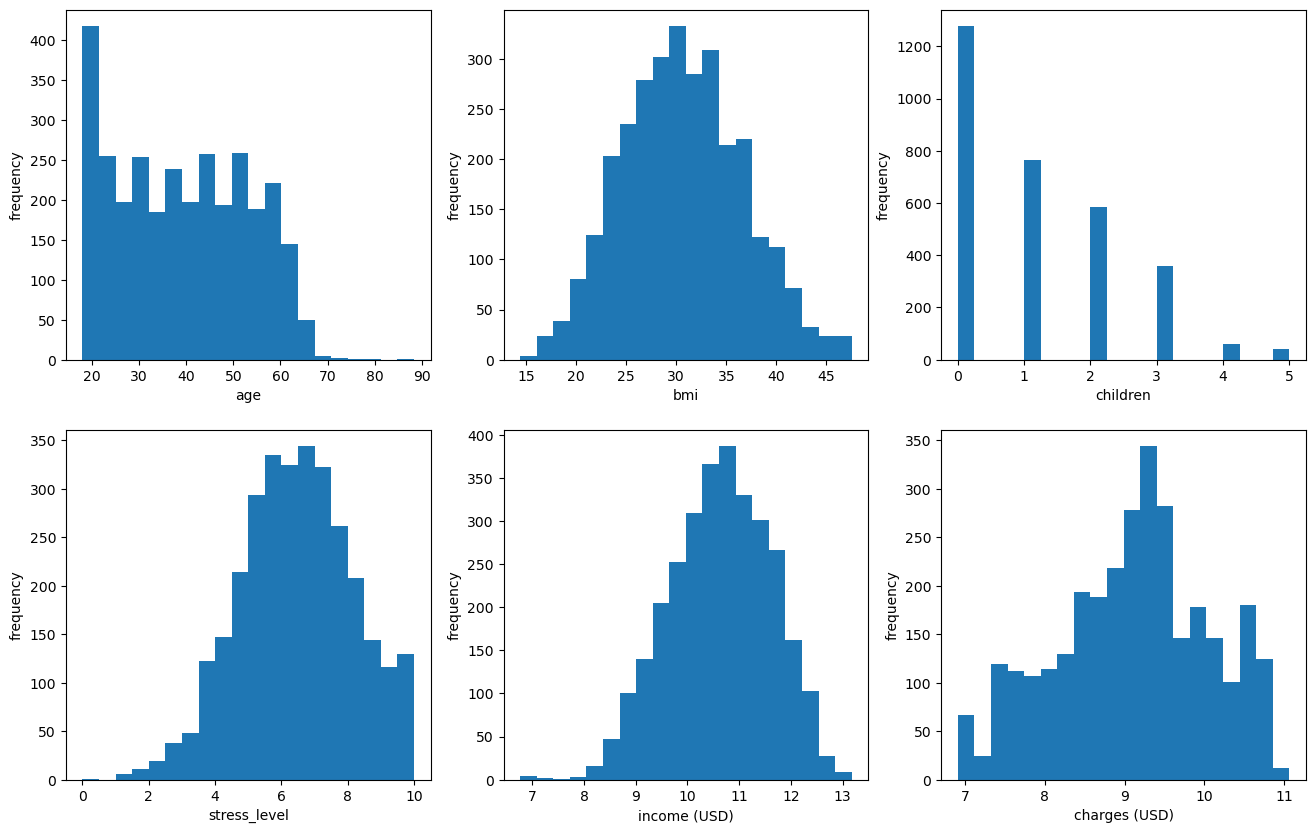

In [15]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

binning:

let's bin to <25, 25-35, 35-45 ... >65

In [16]:
cut = [15, 25, 35, 45, 55, 65, 100]
labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65+']
df.age = pd.cut(df.age, bins=cut, labels=labels)
df

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest,negative_income_flag
0,35-45,25.700,3.0,Single,Education,1.0,6.9,1.0,10.699312,9.116337,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,25-35,28.120,4.0,Engaged,IT Support,0.0,6.9,0.0,11.538154,9.974574,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,35-45,37.100,2.0,Single,Transportation,3.0,5.9,1.0,9.821758,8.905549,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25-35,31.065,0.0,Single,Education,0.0,5.9,1.0,9.608384,7.901218,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,15-25,34.960,3.0,Married,Hospitality,0.0,8.6,2.0,9.653242,8.404611,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,45-55,34.210,2.0,Married,Finance,1.0,9.2,0.0,12.725259,10.697876,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3094,15-25,31.350,4.0,Single,Retail,0.0,10.0,0.0,9.981626,8.425558,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3095,35-45,23.870,5.0,Single,Transportation,1.0,5.8,2.0,10.501189,9.057574,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3096,55-65,25.175,0.0,Single,Education,1.0,4.7,0.0,11.148742,9.386990,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Imputation time

In [17]:
df.isna().sum()

age                     23
bmi                     48
children                 0
status                   1
work_sector             39
physical_activity       78
stress_level             0
sleep_quality            0
income (USD)            54
charges (USD)           23
smoking                  0
not_smoking              0
is_male                  0
region_northwest         0
region_southeast         0
region_southwest         0
negative_income_flag     0
dtype: int64

let's drop all rows for charges (as it's target feature)

In [18]:
df = df[~df['charges (USD)'].isna()]

work sector: is something not imputable (as it's a job I will make Missing values 'Unknown')

In [19]:
df.loc[:, 'work_sector'] = df['work_sector'].fillna('Unknown')

age: we are missing only 23 vals, so let's fill with mode

In [20]:
df.loc[:, 'age'] = df['age'].fillna(df['age'].mode()[0])

physical activity: we are missing only 79 vals, fill with mode

In [21]:
df.loc[:, 'physical_activity'] = df['physical_activity'].fillna(df['physical_activity'].mode()[0])

status: same

In [22]:
df.loc[:, 'status'] = df['status'].fillna(df['status'].mode()[0])

now we can do imputation:
- split
- scale
- kNN impute

In [23]:
y = df.pop('charges (USD)')
X = df

In [24]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=seed, shuffle=True
)

Now we gonna scale + impute

In [25]:
cols = ['bmi', 'stress_level', 'income (USD)']
standard_scaler = sk.preprocessing.StandardScaler()
X_train[cols] = standard_scaler.fit_transform(X_train[cols])
X_test[cols] = standard_scaler.transform(X_test[cols])

for kNN imputation I'll use Jensen–Shannon divergence formula, to keep distribution alike

In [26]:
def jsd(x, y, bins=30, eps=1e-12):
    hx, e = np.histogram(np.asarray(x, float)[~np.isnan(x)], bins=bins, density=True)
    hy, _ = np.histogram(np.asarray(y, float)[~np.isnan(y)], bins=e, density=True)
    hx = (hx + eps)
    hy = (hy + eps)
    hx /= hx.sum()
    hy /= hy.sum()
    m = 0.5 * (hx + hy)
    js = 0.5 * np.sum(hx * (np.log(hx) - np.log(m))) + 0.5 * np.sum(hy * (np.log(hy) - np.log(m)))
    return float(js / (np.log2(len(hx)) if len(hx) > 1 else 1.0))

In [27]:
def try_knn(n):
    X_train_copy = X_train.copy()
    kNN_imputer = sk.impute.KNNImputer(n_neighbors=n)
    X_train_copy[cols] = kNN_imputer.fit_transform(X_train_copy[cols])
    avg_loss = 0
    for col in cols:
        avg_loss += jsd(X_train[col], X_train_copy[col])
    avg_loss /= len(cols)
    return avg_loss

In [28]:
best_n = -1
best_loss = float('inf')
for n in range(1, 101):
    avg_loss = try_knn(n)
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_n = n
print(f'Best N: {best_n} with loss: {best_loss}')

Best N: 2 with loss: 2.6567176521423917e-06


In [29]:
kNN_imputer = sk.impute.KNNImputer(n_neighbors=best_n)
X_train[cols] = kNN_imputer.fit_transform(X_train[cols])
X_test[cols] = kNN_imputer.transform(X_test[cols])

In [30]:
cat_cols = ['status', 'work_sector', 'age']

encoder = sk.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False)

Xtr_cat = encoder.fit_transform(X_train[cat_cols])
Xte_cat = encoder.transform(X_test[cat_cols])

cat_names = encoder.get_feature_names_out(cat_cols)
Xtr_cat = pd.DataFrame(Xtr_cat, index=X_train.index, columns=cat_names)
Xte_cat = pd.DataFrame(Xte_cat, index=X_test.index, columns=cat_names)

num_cols = [c for c in X_train.columns if c not in cat_cols]
X_train = pd.concat([X_train[num_cols].reset_index(drop=True), Xtr_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test[num_cols].reset_index(drop=True), Xte_cat.reset_index(drop=True)], axis=1)

In [31]:
X_train.isna().sum()

bmi                               0
children                          0
physical_activity                 0
stress_level                      0
sleep_quality                     0
income (USD)                      0
smoking                           0
not_smoking                       0
is_male                           0
region_northwest                  0
region_southeast                  0
region_southwest                  0
negative_income_flag              0
status_Engaged                    0
status_Married                    0
status_Single                     0
status_Single-Parent              0
work_sector_Construction          0
work_sector_Education             0
work_sector_Engineering           0
work_sector_Entrepreneur          0
work_sector_Finance               0
work_sector_Healthcare            0
work_sector_Healthcare Support    0
work_sector_Hospitality           0
work_sector_IT                    0
work_sector_IT Support            0
work_sector_Law             

### Feature selection

I'll do 3 shown methods, retrieve their masks and sum them to get finale feature subset

In [32]:
select1 = sk.feature_selection.SelectKBest(k=30)
select1.fit(X_train, y_train)
mask1 = select1.get_support()
mask1

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True])

In [33]:
select2 = sk.feature_selection.SelectFromModel(sk.ensemble.RandomForestRegressor(n_estimators=100, random_state=seed),
                                               threshold="median")
select2.fit(X_train, y_train)
mask2 = select2.get_support()
mask2

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False])

In [34]:
select3 = sk.feature_selection.RFE(sk.ensemble.RandomForestRegressor(n_estimators=100, random_state=seed),
                                   n_features_to_select=30)
select3.fit(X_train, y_train)
mask3 = select3.get_support()
mask3

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True])

In [35]:
final_mask = mask1.astype(int) + mask2.astype(int) + mask3.astype(int)

now let's drop those with score less then 2

In [36]:
final_mask = final_mask > 1
final_mask

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True])

so we are going to drop those columns:

In [37]:
X_train.columns[~final_mask]

Index(['not_smoking', 'status_Engaged', 'work_sector_Education',
       'work_sector_Engineering', 'work_sector_Entrepreneur',
       'work_sector_Healthcare Support', 'work_sector_IT Support',
       'work_sector_Law', 'work_sector_Retail Management',
       'work_sector_Transportation', 'work_sector_Unemployed',
       'work_sector_Unknown'],
      dtype='object')

In [38]:
X_train_reduced = X_train.loc[:, final_mask]
X_test_reduced = X_test.loc[:, final_mask]

In [39]:
print(f'{X_train.shape[1]} features reduced to {X_test_reduced.shape[1]} features')

41 features reduced to 29 features


# Linear Regression

3.a) Let's test sklearn implementation of Linear regression

In [40]:
model = sk.linear_model.LinearRegression()
model.fit(X_train_reduced, y_train)

y_pred_train = model.predict(X_train_reduced)
y_pred_test = model.predict(X_test_reduced)

print("intercept_:", model.intercept_)
print("coef_:", model.coef_)
print("RMSE (train):", sk.metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE (test):", sk.metrics.mean_squared_error(y_test, y_pred_test))
print("R^2 (train):", sk.metrics.r2_score(y_train, y_pred_train))
print("R^2 (test):", sk.metrics.r2_score(y_test, y_pred_test))

intercept_: 8.997593548106634
coef_: [ 0.00648103  0.03426516 -0.02663819  0.01466097 -0.0095537   0.41551449
  0.39158181 -0.05068705  0.0412797  -0.051266   -0.00172654 -0.20274899
  0.31229103 -0.01779036  0.36754431 -0.12968991  0.37969014  0.31997338
 -0.07079711  0.53155714  0.31823106 -0.09475475 -0.04530122 -0.40259986
 -0.21039408 -0.03814473  0.14909773  0.23360354  0.2684374 ]
RMSE (train): 0.2116849447976829
RMSE (test): 0.20779290051821972
R^2 (train): 0.7665079932990021
R^2 (test): 0.7680067135632761


Now, let's do linear regression by our own

In [41]:
from dataclasses import dataclass
import numpy as np
import sklearn as sk

@dataclass
class EpochLog:
    epoch: int
    train_losses: tuple[float, float, float, float]  # MSE, RMSE, MAE, R2
    test_losses:  tuple[float, float, float, float]  # MSE, RMSE, MAE, R2
    theta: list[float]

def _assert_no_nan(name, arr):
    A = np.asarray(arr)
    if not np.isfinite(A).all():
        raise ValueError(f"{name} contains NaN/Inf. Check preprocessing.")

def _soft_threshold(v: np.ndarray, thresh: float) -> np.ndarray:
    # elementwise soft-thresholding
    return np.sign(v) * np.maximum(np.abs(v) - thresh, 0.0)

def linear_regression(
    eta, n_epochs, data, test, y_train, y_test,
    batch_size=None, seed=42, divergence_guard=1e12,
    lasso: bool=False, ridge: bool=False, alpha: float=1e-3
):
    """
    Mini-batch / batch GD for linear regression with optional regularization.

    Loss (per sample):
      MSE:      (1/n) ||X w - y||^2
      Ridge:    (1/n) ||X w - y||^2 + alpha * ||w_no_bias||_2^2
      Lasso:    (1/n) ||X w - y||^2 + alpha * ||w_no_bias||_1

    Notes:
      - Set *either* lasso=True *or* ridge=True (not both).
      - alpha should be tuned on validation.
      - Bias term (w[0]) is NOT regularized.
    """
    if lasso and ridge:
        raise ValueError("Choose only one: lasso=True or ridge=True (not both).")

    # ---- Convert to float64 numpy
    X_train = np.asarray(data, dtype=np.float64)
    X_test  = np.asarray(test, dtype=np.float64)
    ytr_all = np.asarray(y_train, dtype=np.float64).reshape(-1)
    yte_all = np.asarray(y_test,  dtype=np.float64).reshape(-1)

    # ---- Pre-flight NaN checks
    _assert_no_nan("X_train", X_train)
    _assert_no_nan("X_test",  X_test)
    _assert_no_nan("y_train", ytr_all)
    _assert_no_nan("y_test",  yte_all)

    n_samples, n_features = X_train.shape
    batch_size = batch_size or n_samples

    logs: list[EpochLog] = []
    rng = np.random.default_rng(seed)

    # params (include bias)
    theta = rng.standard_normal(n_features + 1).astype(np.float64)  # shape (p+1,)

    # add bias column for test
    Xt = np.c_[np.ones((len(X_test), 1)), X_test]  # (n_test, p+1)

    for epoch in range(1, n_epochs + 1):
        idx = rng.permutation(n_samples)

        # shuffle in unison
        Xtr_no_bias = X_train[idx]
        ytr = ytr_all[idx]

        # bias column
        Xtr = np.c_[np.ones((len(Xtr_no_bias), 1)), Xtr_no_bias]  # (n_train, p+1)

        # mini-batch loop
        n_steps = (n_samples + batch_size - 1) // batch_size
        for step in range(n_steps):
            start = step * batch_size
            end = min(start + batch_size, n_samples)

            Xb = Xtr[start:end]   # (b, p+1)  first col = 1 for bias
            yb = ytr[start:end]   # (b,)

            # gradient for smooth MSE part: (2/b) * X^T (Xw - y)
            residuals = Xb @ theta - yb
            if not np.isfinite(residuals).all() or np.max(np.abs(residuals)) > divergence_guard:
                break

            grad = (2.0 / Xb.shape[0]) * (Xb.T @ residuals)        # (p+1,)

            if ridge:
                # L2 on weights except bias: grad += 2*alpha * w_no_bias_pad
                ridge_term = np.zeros_like(theta)
                ridge_term[1:] = 2.0 * alpha * theta[1:]
                grad += ridge_term
                # plain GD step
                theta -= eta * grad

            elif lasso:
                # Proximal gradient (ISTA) for L1 on w_no_bias
                # 1) gradient step on smooth part
                w_temp = theta - eta * grad
                # 2) soft-threshold *excluding bias*
                w_new = w_temp.copy()
                w_new[1:] = _soft_threshold(w_temp[1:], eta * alpha)
                theta = w_new

            else:
                # plain GD (no regularization)
                theta -= eta * grad

        # ---- predictions and metrics
        ytr_pred = Xtr @ theta
        yt_pred  = Xt  @ theta

        _assert_no_nan("ytr_pred", ytr_pred)
        _assert_no_nan("yt_pred",  yt_pred)

        tr_losses = (
            sk.metrics.mean_squared_error(ytr, ytr_pred),
            sk.metrics.root_mean_squared_error(ytr, ytr_pred),
            sk.metrics.mean_absolute_error(ytr, ytr_pred),
            sk.metrics.r2_score(ytr, ytr_pred),
        )
        t_losses = (
            sk.metrics.mean_squared_error(yte_all, yt_pred),
            sk.metrics.root_mean_squared_error(yte_all, yt_pred),
            sk.metrics.mean_absolute_error(yte_all, yt_pred),
            sk.metrics.r2_score(yte_all, yt_pred),
        )

        logs.append(EpochLog(
            epoch=epoch,
            train_losses=tuple(float(x) for x in tr_losses),
            test_losses=tuple(float(x) for x in t_losses),
            theta=theta.astype(float).tolist()
        ))

    return logs


In [42]:
def find_best_epoch(logs: list[EpochLog]):
    best_epoch = 1
    for log in logs:
        if log.test_losses[0] < logs[best_epoch - 1].test_losses[0]:
            best_epoch = log.epoch
    return logs[best_epoch - 1]

Now let's tune

In [43]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for i in range(1, 300, 5):
    eta = 0.001 * i
    print(f'eta: {eta}')
    logs = linear_regression(eta, data=X_train_reduced, test=X_test_reduced, y_train=y_train, y_test=y_test, n_epochs=500)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

eta: 0.001
eta: 0.006
eta: 0.011
eta: 0.016
eta: 0.021
eta: 0.026000000000000002
eta: 0.031
eta: 0.036000000000000004
eta: 0.041
eta: 0.046
eta: 0.051000000000000004
eta: 0.056
eta: 0.061
eta: 0.066
eta: 0.07100000000000001
eta: 0.076
eta: 0.081
eta: 0.08600000000000001
eta: 0.091
eta: 0.096
eta: 0.101
eta: 0.106
eta: 0.111
eta: 0.116
eta: 0.121
eta: 0.126
eta: 0.131
eta: 0.136
eta: 0.14100000000000001
eta: 0.146
eta: 0.151
eta: 0.156
eta: 0.161
eta: 0.166
eta: 0.171
eta: 0.176
eta: 0.181
eta: 0.186
eta: 0.191
eta: 0.196
eta: 0.201
eta: 0.20600000000000002
eta: 0.211
eta: 0.216
eta: 0.221
eta: 0.226
eta: 0.231
eta: 0.23600000000000002
eta: 0.241
eta: 0.246
eta: 0.251
eta: 0.256
eta: 0.261
eta: 0.266
eta: 0.271
eta: 0.276
eta: 0.281
eta: 0.28600000000000003
eta: 0.291
eta: 0.296


Now let's plot

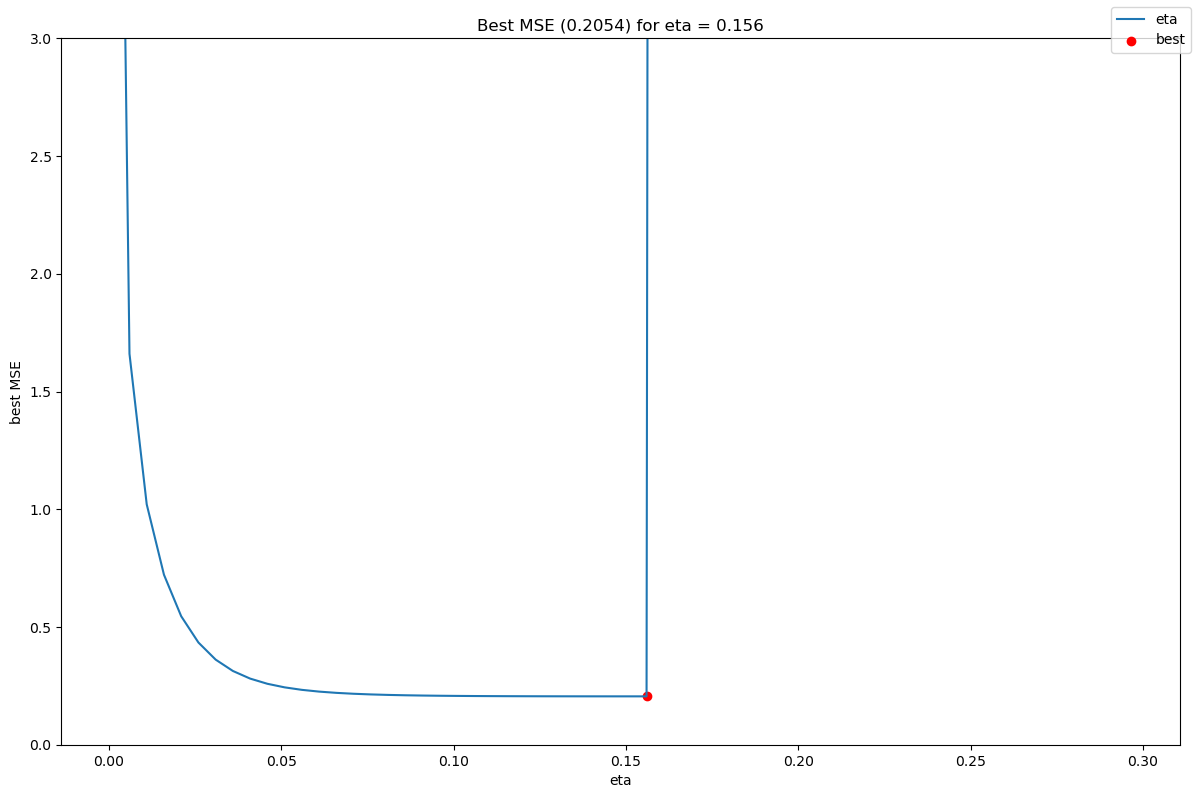

In [44]:
eta_x = [i for (i, _, _) in eta_logs]
eta_y = [i for (_, _, i) in eta_logs]
best_idx = np.argmin(eta_y)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(eta_x, eta_y, label='eta')
ax.scatter(eta_x[best_idx], eta_y[best_idx], marker='o', label='best', color='r')
ax.set_xlabel('eta')
ax.set_ylabel('best MSE')
ax.set_title(f'Best MSE ({eta_y[best_idx]:.4}) for eta = {eta_x[best_idx]}')
ax.set_ylim([0, 3])
fig.legend()
fig.tight_layout()
plt.show()

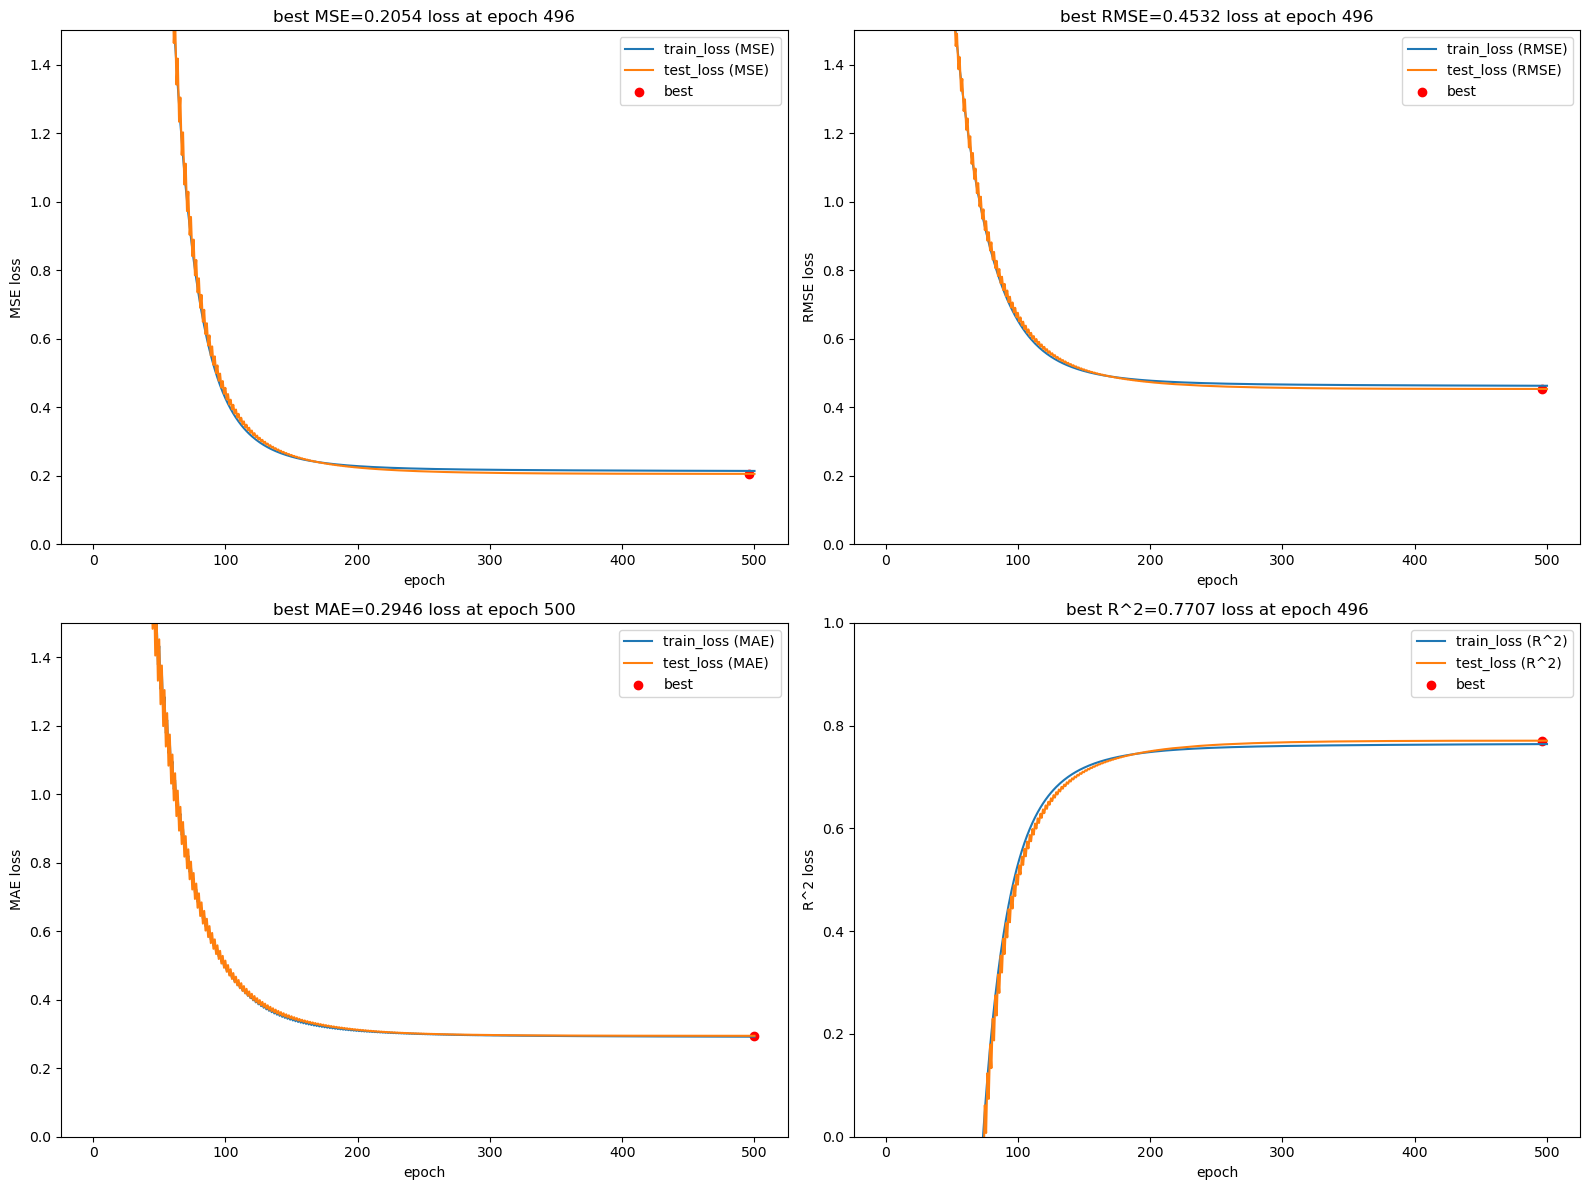

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

Let's do same for Mini-Batches!

In [46]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for i in range(1, 300, 5):
    eta = 0.001 * i
    print(f'eta: {eta}')
    logs = linear_regression(eta, data=X_train_reduced, test=X_test_reduced, y_train=y_train, y_test=y_test, n_epochs=500, batch_size=64)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

eta: 0.001
eta: 0.006
eta: 0.011
eta: 0.016
eta: 0.021
eta: 0.026000000000000002
eta: 0.031
eta: 0.036000000000000004
eta: 0.041
eta: 0.046
eta: 0.051000000000000004
eta: 0.056
eta: 0.061
eta: 0.066
eta: 0.07100000000000001
eta: 0.076
eta: 0.081
eta: 0.08600000000000001
eta: 0.091
eta: 0.096
eta: 0.101
eta: 0.106
eta: 0.111
eta: 0.116
eta: 0.121
eta: 0.126
eta: 0.131
eta: 0.136
eta: 0.14100000000000001
eta: 0.146
eta: 0.151
eta: 0.156
eta: 0.161
eta: 0.166
eta: 0.171
eta: 0.176
eta: 0.181
eta: 0.186
eta: 0.191
eta: 0.196
eta: 0.201
eta: 0.20600000000000002
eta: 0.211
eta: 0.216
eta: 0.221
eta: 0.226
eta: 0.231
eta: 0.23600000000000002
eta: 0.241
eta: 0.246
eta: 0.251
eta: 0.256
eta: 0.261
eta: 0.266
eta: 0.271
eta: 0.276
eta: 0.281
eta: 0.28600000000000003
eta: 0.291
eta: 0.296


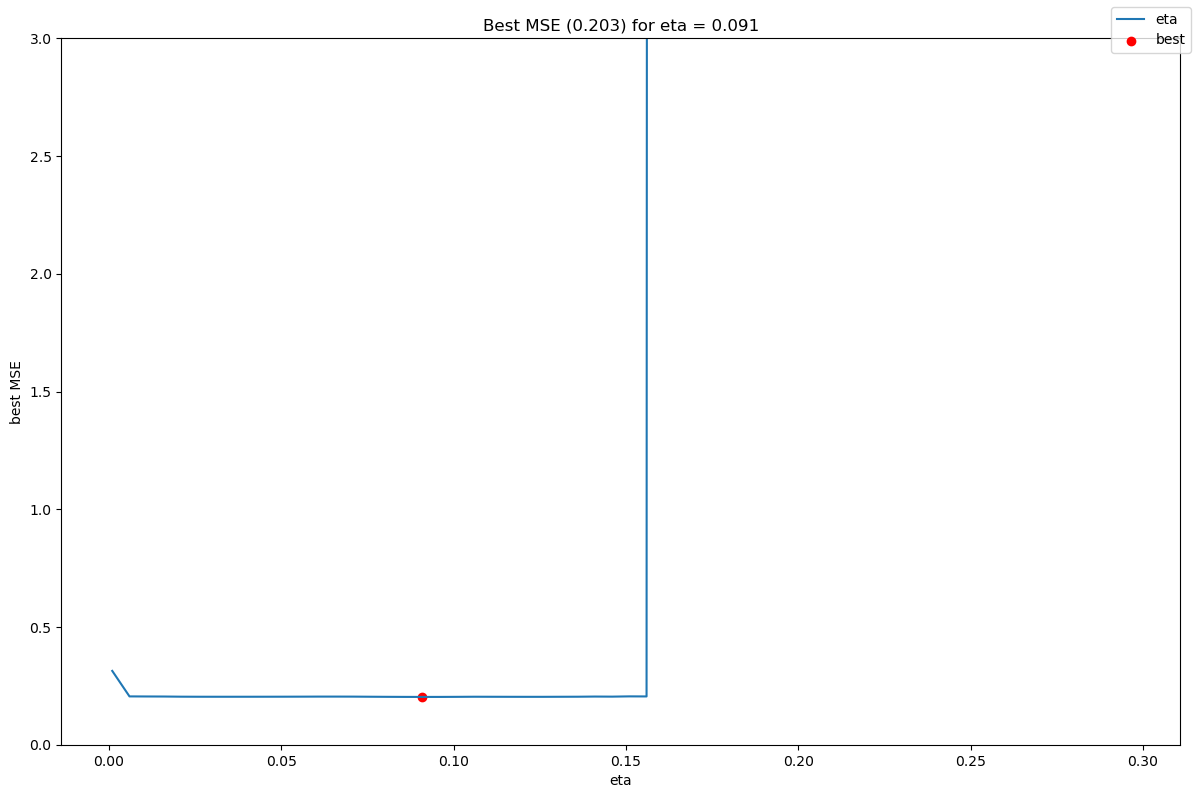

In [47]:
eta_x = [i for (i, _, _) in eta_logs]
eta_y = [i for (_, _, i) in eta_logs]
best_idx = np.argmin(eta_y)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(eta_x, eta_y, label='eta')
ax.scatter(eta_x[best_idx], eta_y[best_idx], marker='o', label='best', color='r')
ax.set_xlabel('eta')
ax.set_ylabel('best MSE')
ax.set_title(f'Best MSE ({eta_y[best_idx]:.4}) for eta = {eta_x[best_idx]}')
ax.set_ylim([0, 3])
fig.legend()
fig.tight_layout()
plt.show()

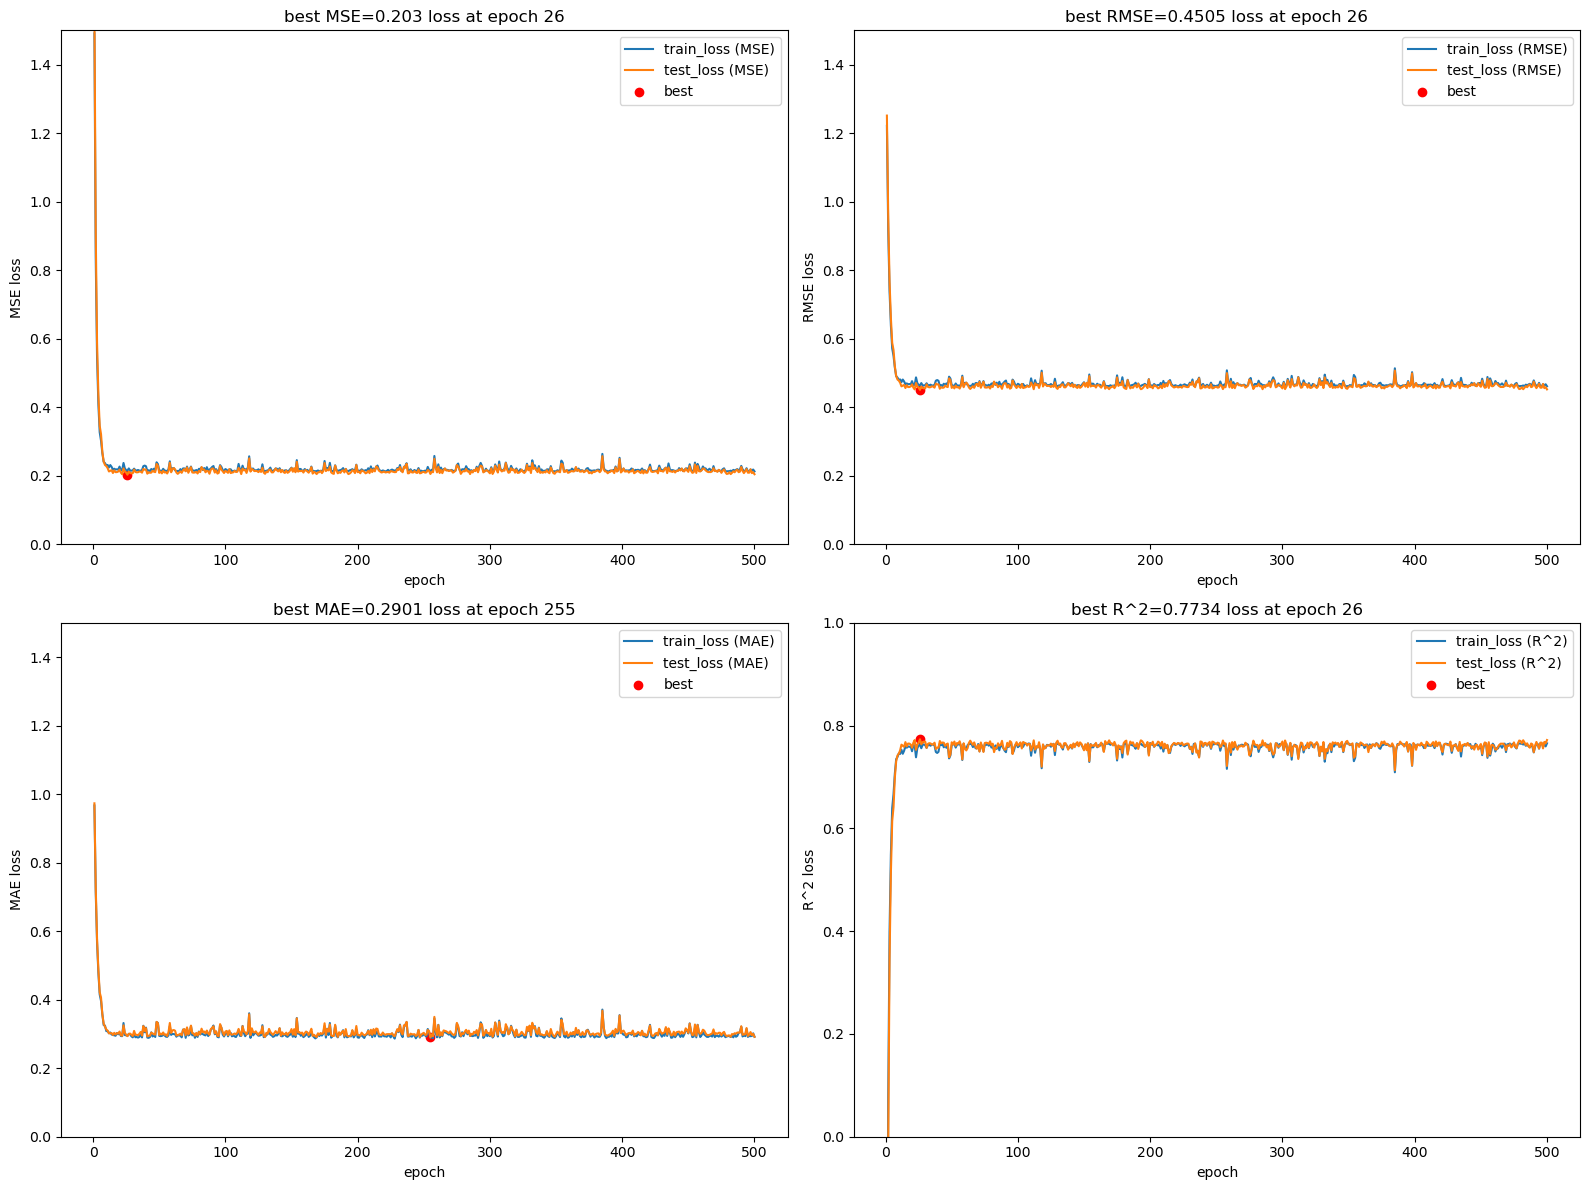

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

Now let's try with polynomial features

In [49]:
poly = sk.preprocessing.PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

In [50]:
X_train_reduced

,bmi,children,physical_activity,stress_level,sleep_quality,income (USD),smoking,is_male,region_northwest,region_southeast,...,work_sector_IT,work_sector_Management,work_sector_Retail,work_sector_Self-Employed,age_15-25,age_25-35,age_35-45,age_45-55,age_55-65,age_65+
0,0.173087,2.0,3.0,0.861036,0.0,0.609538,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.824056,0.0,1.0,-0.725324,1.0,-1.152724,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.404830,2.0,1.0,0.567266,0.0,0.333735,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.017657,0.0,1.0,-0.020275,0.0,-1.054385,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.504643,2.0,0.0,-0.607816,0.0,0.239368,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,1.404830,2.0,2.0,-0.314045,1.0,1.155083,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2294,-0.950847,2.0,1.0,0.684774,0.0,-1.194811,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2295,0.204842,0.0,2.0,-0.607816,0.0,-2.042709,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2296,-1.478149,1.0,1.0,0.567266,2.0,-0.385735,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
#numeric_cols = X_train_reduced.columns
numeric_cols = ['bmi', 'children', 'physical_activity', 'stress_level', 'negative_income_flag', 'income (USD)']
numeric_cols

['bmi',
 'children',
 'physical_activity',
 'stress_level',
 'negative_income_flag',
 'income (USD)']

In [52]:
Xtr_num = X_train_reduced[numeric_cols]
Xt_num = X_test_reduced[numeric_cols]

Xtr_poly = poly.fit_transform(Xtr_num)
Xte_poly  = poly.transform(Xt_num)

sc = sk.preprocessing.StandardScaler()
Xtr_poly = sc.fit_transform(Xtr_poly)
Xt_poly = sc.transform(Xte_poly)

In [53]:
X_train_augmented = X_train_reduced.drop(columns=numeric_cols)
X_test_augmented = X_test_reduced.drop(columns=numeric_cols)

X_train_augmented = pd.concat([X_train_augmented, pd.DataFrame(Xtr_poly, columns=poly.get_feature_names_out())],axis=1)
X_test_augmented = pd.concat([X_test_augmented, pd.DataFrame(Xte_poly, columns=poly.get_feature_names_out())], axis=1)

Now let's do the same with augs

In [54]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for i in range(1, 33, 1):
    eta = 0.01 * i
    print(f'eta: {eta}')
    logs = linear_regression(eta, data=X_train_augmented, test=X_test_augmented, y_train=y_train, y_test=y_test, n_epochs=3000)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

eta: 0.01
eta: 0.02
eta: 0.03
eta: 0.04
eta: 0.05
eta: 0.06
eta: 0.07
eta: 0.08
eta: 0.09
eta: 0.1
eta: 0.11
eta: 0.12
eta: 0.13
eta: 0.14
eta: 0.15
eta: 0.16
eta: 0.17
eta: 0.18
eta: 0.19
eta: 0.2
eta: 0.21
eta: 0.22
eta: 0.23
eta: 0.24
eta: 0.25
eta: 0.26
eta: 0.27
eta: 0.28
eta: 0.29
eta: 0.3
eta: 0.31
eta: 0.32


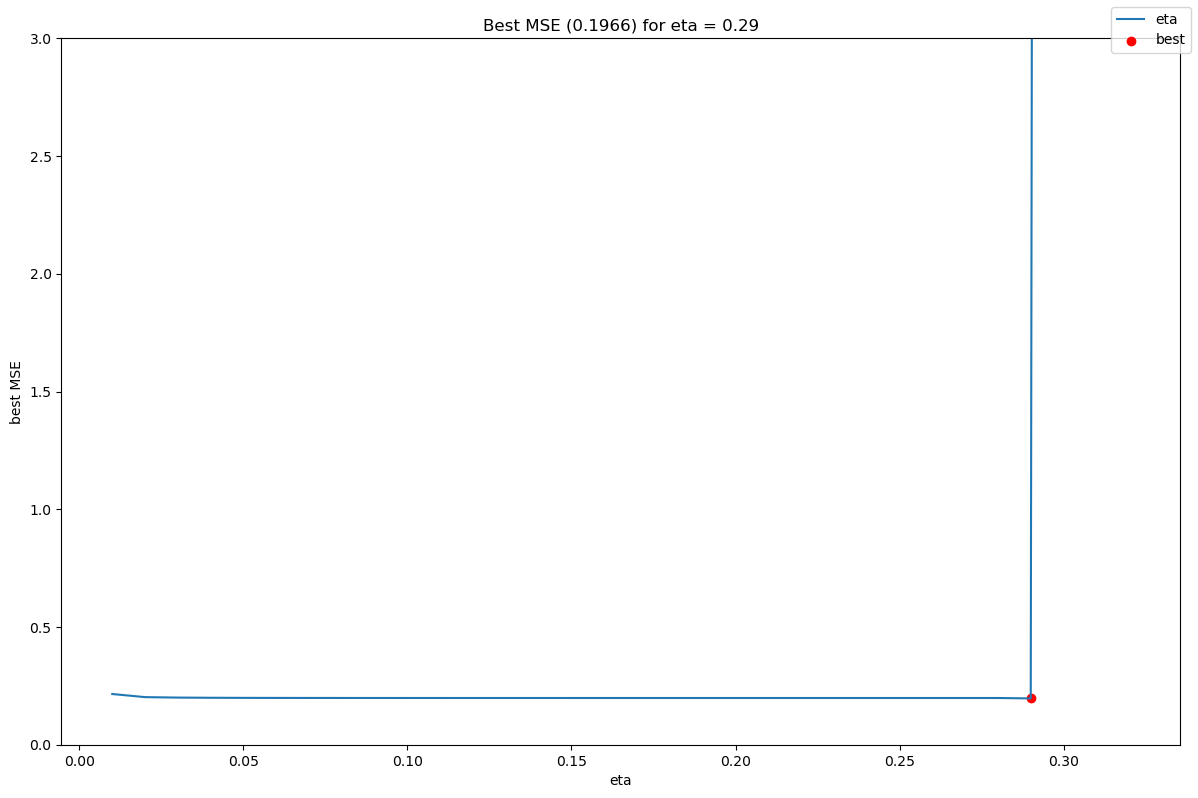

In [55]:
eta_x = [i for (i, _, _) in eta_logs]
eta_y = [i for (_, _, i) in eta_logs]
best_idx = np.argmin(eta_y)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(eta_x, eta_y, label='eta')
ax.scatter(eta_x[best_idx], eta_y[best_idx], marker='o', label='best', color='r')
ax.set_xlabel('eta')
ax.set_ylabel('best MSE')
ax.set_title(f'Best MSE ({eta_y[best_idx]:.4}) for eta = {eta_x[best_idx]}')
ax.set_ylim([0, 3])
fig.legend()
fig.tight_layout()
plt.show()

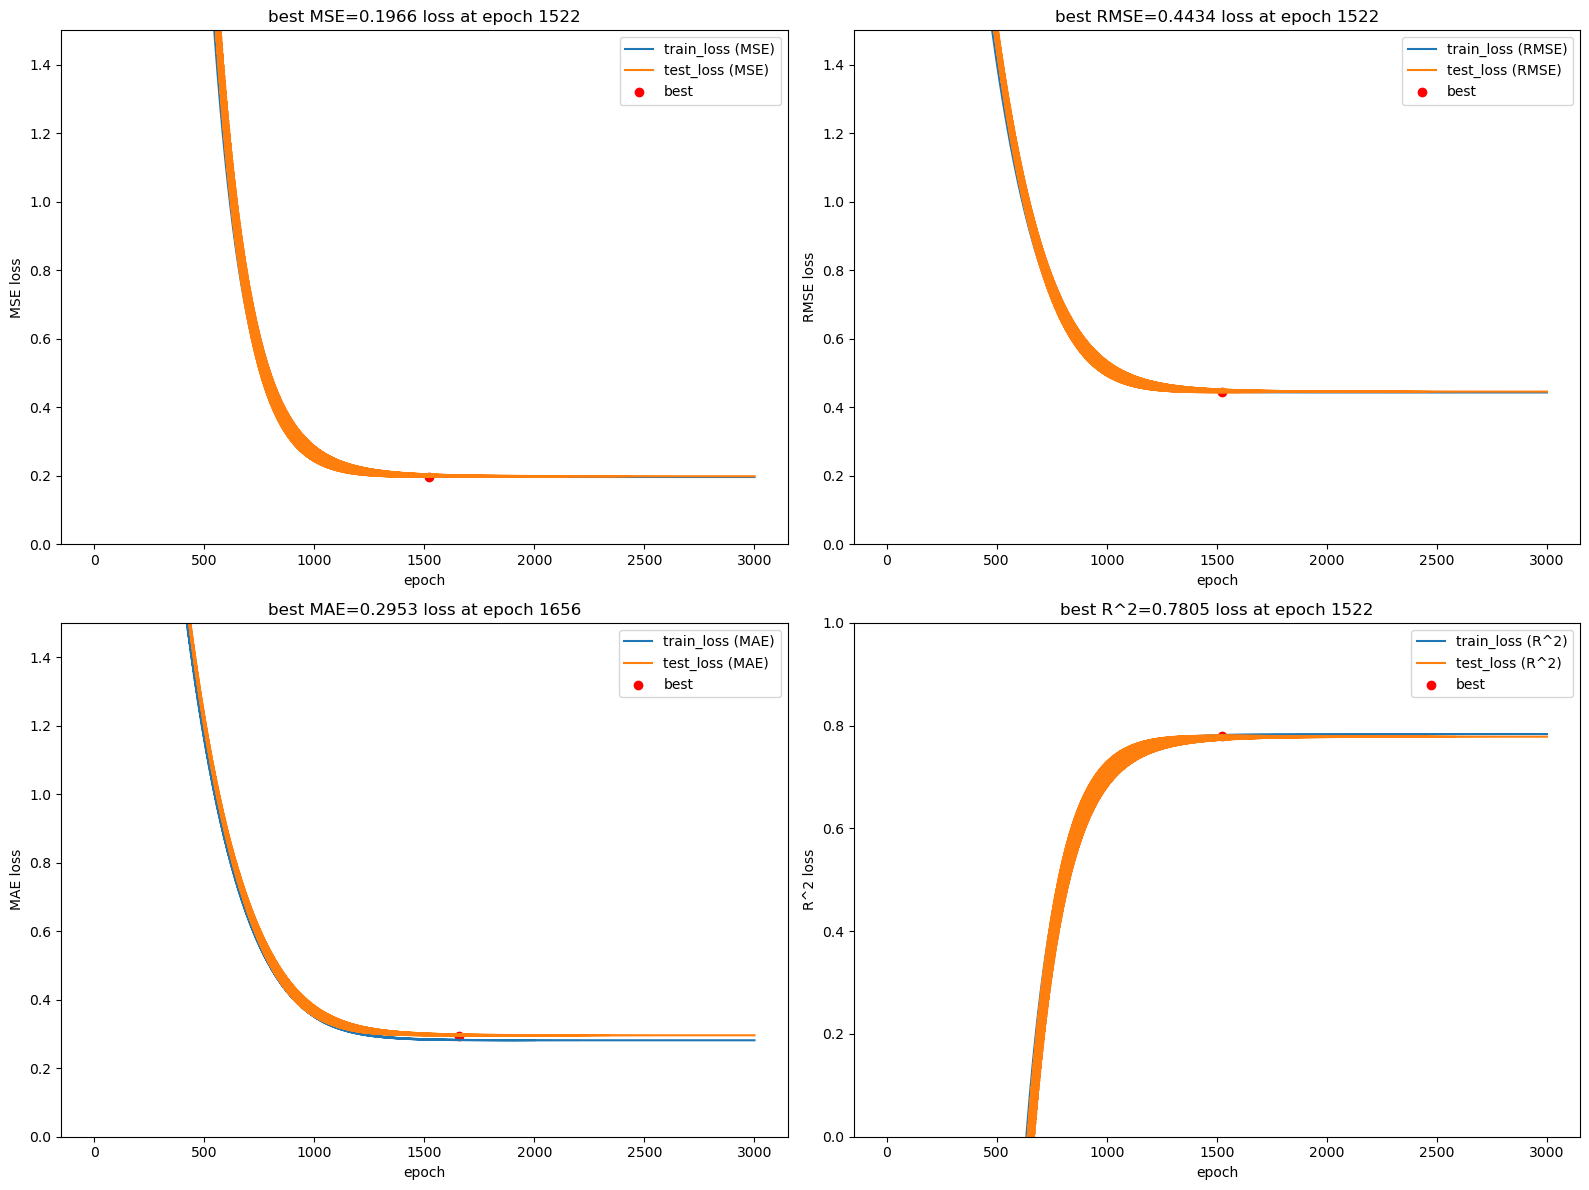

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

As we can see it takes much more time for a model to converge + we need smaller ETA (otherwise it's diverging)

Lasso (best_eta = 0.0076)

In [57]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
best_alpha = None
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

for a in alphas:
    eta = 0.29
    print(f'alpha: {a}')
    logs = linear_regression(eta, data=X_train_augmented, test=X_test_augmented, y_train=y_train, y_test=y_test, n_epochs=3000, lasso=True,
                             alpha=a)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs
        best_alpha = a

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

alpha: 1e-05
alpha: 5e-05
alpha: 0.0001
alpha: 0.0005
alpha: 0.001
alpha: 0.005
alpha: 0.01
alpha: 0.05
alpha: 0.1
alpha: 0.5
alpha: 1


In [58]:
print(f'best alpha: {best_alpha}')
l = find_best_epoch(best_epoch_logs)
l.theta

best alpha: 0.001


[7.8241945504760615,
 -0.025392026544306556,
 0.3866150059281373,
 -0.03488636545689941,
 0.04285548455723247,
 -0.03945489328831624,
 -0.004030603449055107,
 0.2948090039099307,
 -0.02710618807561705,
 0.31626063027046614,
 -0.14021659441213408,
 0.3729376825321073,
 0.33624911390126794,
 -0.06685613358937362,
 0.48828566394151335,
 0.3007267832428678,
 -0.08861016561018482,
 -5.830916646149236e-05,
 0.7919745957673685,
 0.9347481618090113,
 1.1158055768304118,
 1.3077830946427587,
 1.3786648110911728,
 1.4993255695583392,
 0.011840694125159349,
 0.04862442291503542,
 -0.026659815084576002,
 0.009200420243527383,
 -0.017546644510931506,
 0.5385529525629629,
 -0.0009175867763066623,
 -0.006905158667684597,
 0.003682840268544526,
 0.04289851266698283,
 0.003972871096813347,
 0.007283312181326197,
 0.017088919898593232,
 -0.026275747750449826,
 -0.12489053538900692,
 0.017370780704757227,
 -0.004922707789366427,
 -0.029046960555494473,
 -0.03444995137873183,
 0.011204175131535534,
 -0.04

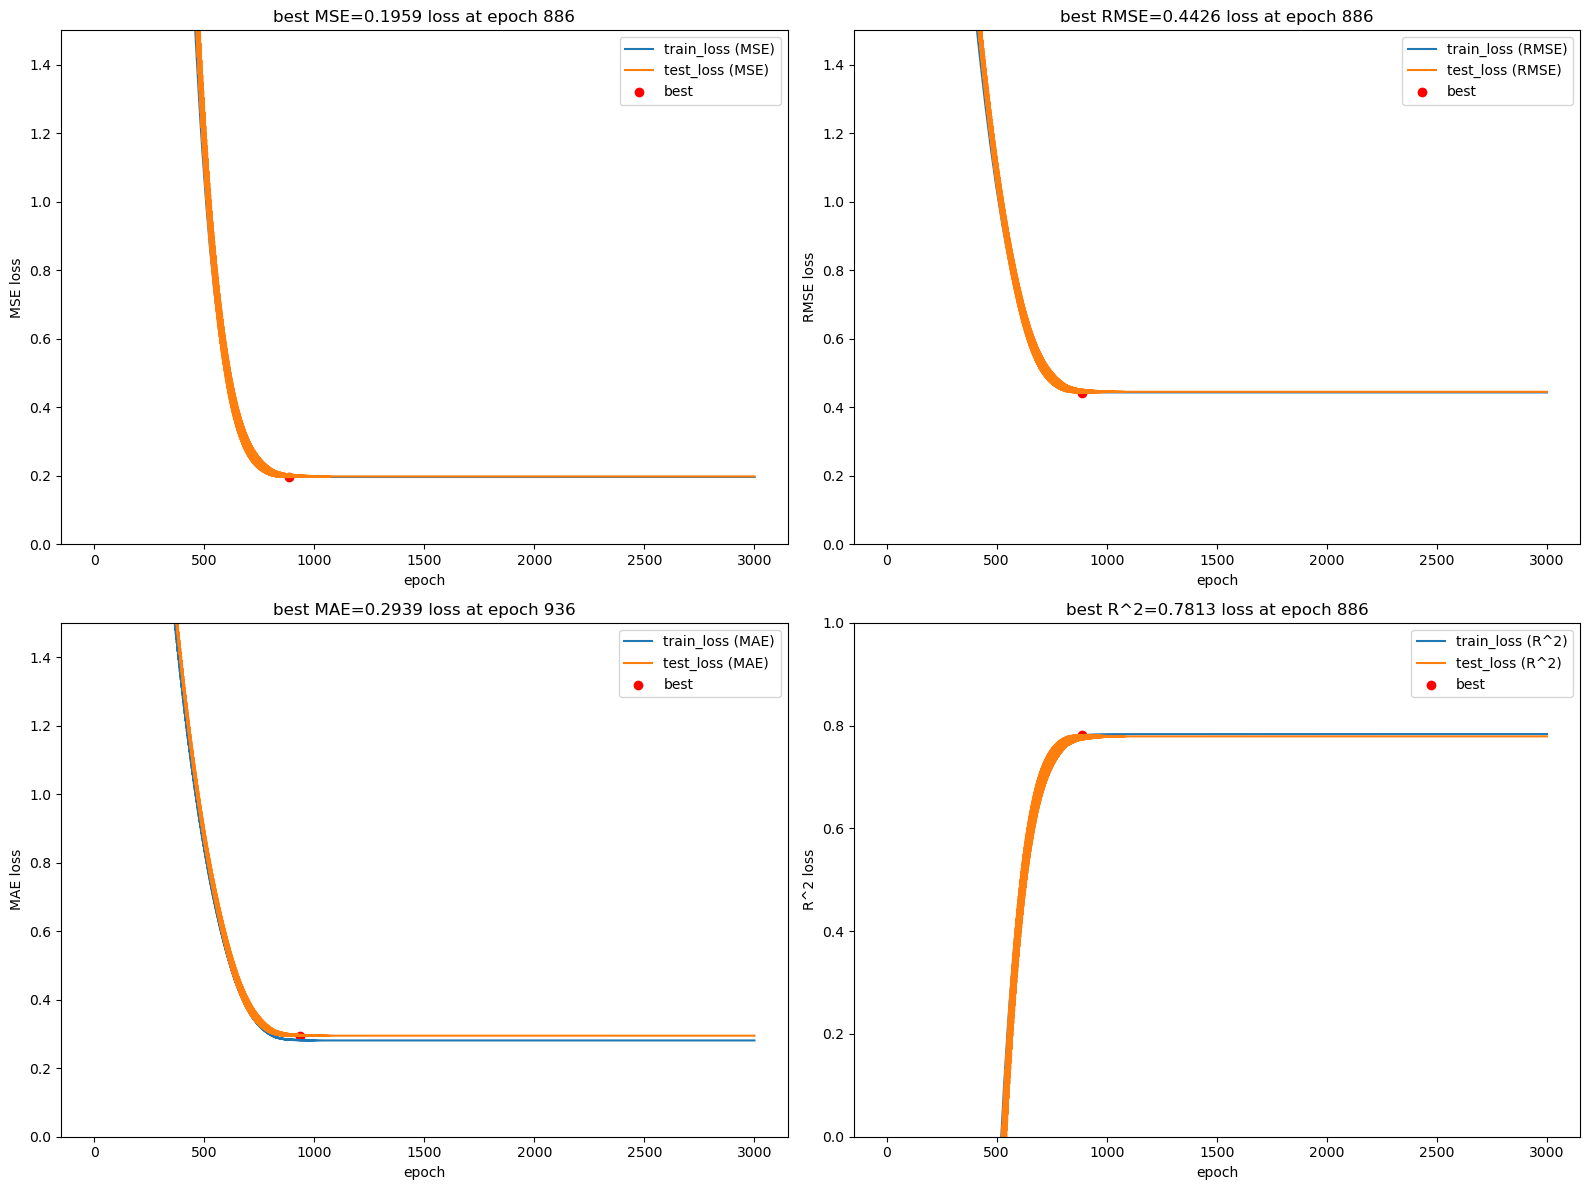

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

In [ ]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for a in alphas:
    eta = 0.29
    print(f'alpha: {a}')
    logs = linear_regression(eta, data=X_train_augmented, test=X_test_augmented, y_train=y_train, y_test=y_test, n_epochs=3000, ridge=True,
                             alpha=a)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs
        best_alpha = a

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

alpha: 1e-05
alpha: 5e-05


In [62]:
print(f'best alpha: {best_alpha}')
l = find_best_epoch(best_epoch_logs)
l.theta

best alpha: 0.001


[8.43736934174792,
 -0.025942443858630128,
 0.38441143913102904,
 -0.036974074482973976,
 0.044075556757634166,
 -0.041659873011694756,
 -0.00479736392378144,
 0.29380224386256637,
 -0.028296147428170035,
 0.3228625462096741,
 -0.14902781490342504,
 0.3752767125814228,
 0.3372988136173524,
 -0.0718581003214558,
 0.4835798497195542,
 0.3028156547699449,
 -0.09332086999685582,
 -0.03800844684062946,
 0.18680286512465097,
 0.32851903086389284,
 0.509010984133671,
 0.7007188379351627,
 0.7700711671401885,
 0.973837136835122,
 0.016297001596953936,
 0.04814622076223715,
 -0.027803502065223234,
 0.005443445766971028,
 -0.021432114526451895,
 0.5398066903278596,
 -0.0031623549884919324,
 -0.009574356400006187,
 0.004651136957193763,
 0.04334981893697369,
 0.004299860419115269,
 0.008142864057814593,
 0.017883696196145965,
 -0.025556060602181314,
 -0.12577059654304446,
 0.01959921716127344,
 -0.003972605672887212,
 -0.030783502288759226,
 -0.035581283082820554,
 0.011075495214266092,
 -0.04745

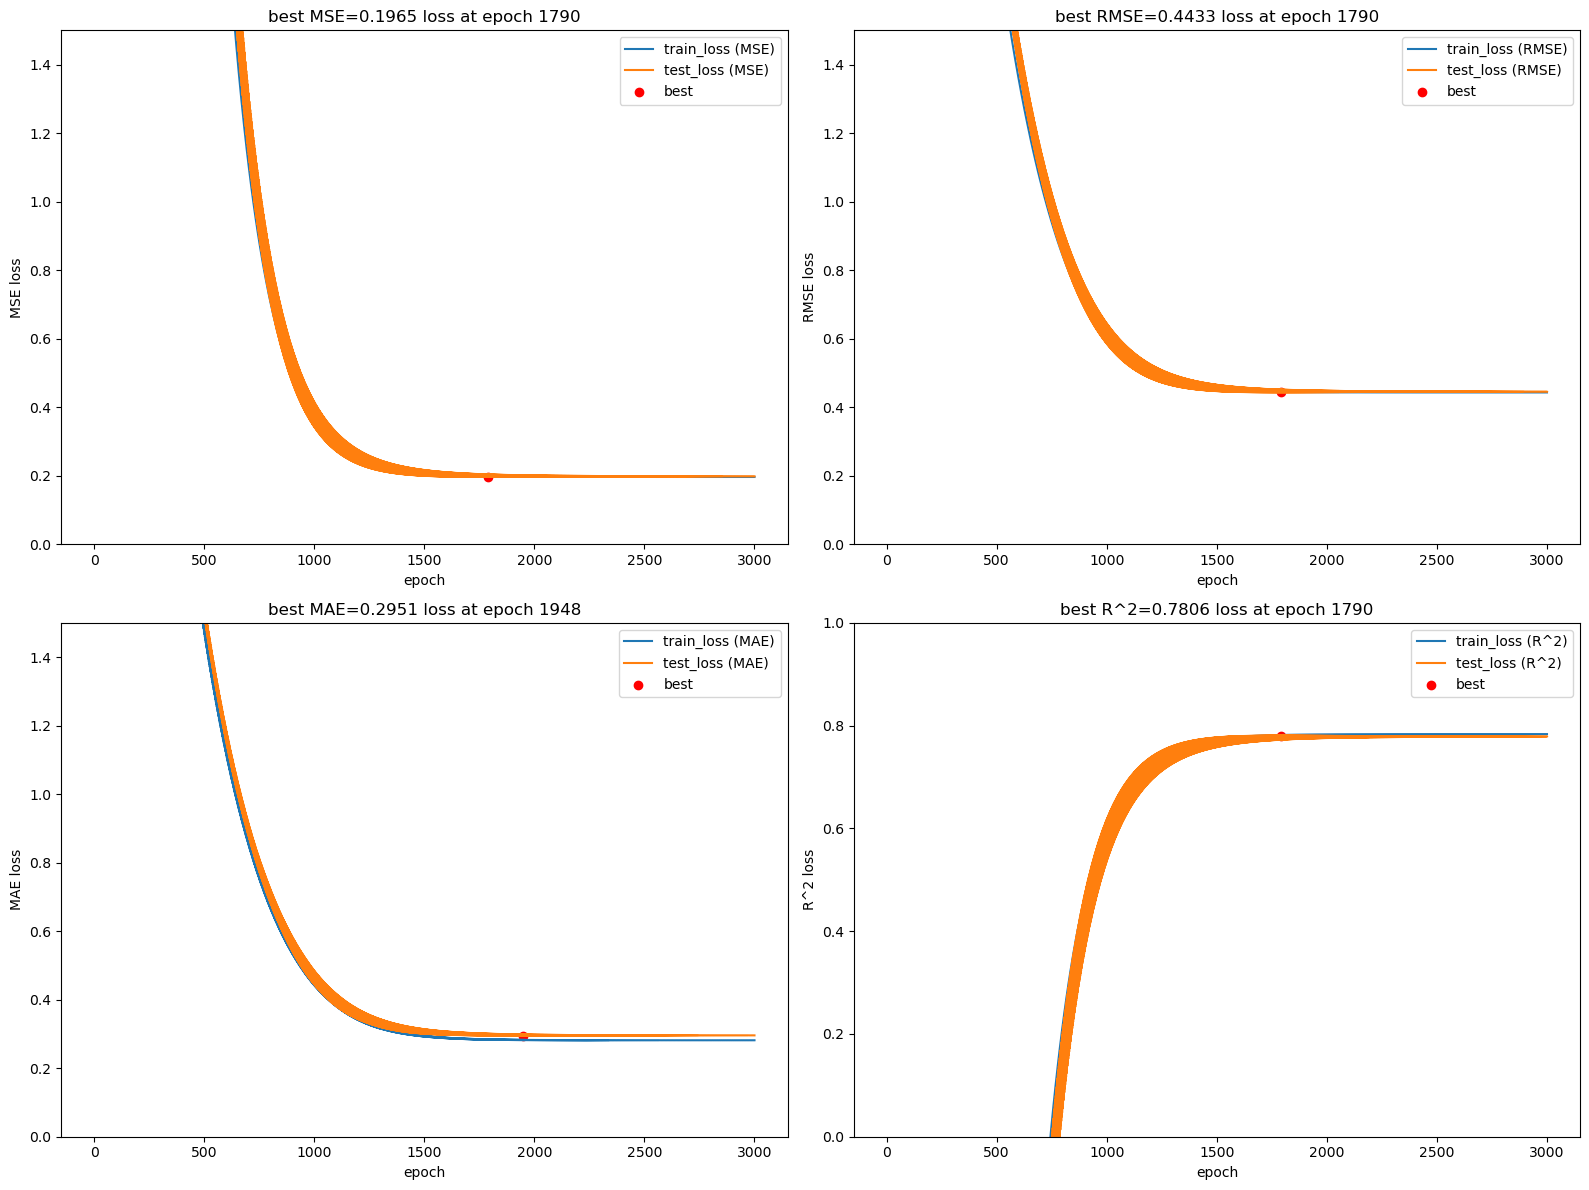

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()